#### Vincenzo Junior Striano, 752871
##### The code is designed to be as fast, as low memory consuming and as much readable as possible
##### APIs and coding style allowed for the smallest human effort when coding
##### HQ images and comments will make the code and the charts much enjoyable. No other files needed to run the code
##### All the rules taught have been applied. I hope.
##### Thanks, enjoy :)

In [1]:
# IMPORTING DATAFRAME
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/vincenzojrs/Personal/main/dfassign.csv')

##### Check if the dataset has missing values and choose a way to correct them. Motivate your choice. (0.25 points)

In [2]:
# LOOKING AT THE DATAFRAME, THERE ARE NO NAN VALUES: ONLY "-", SO REPLACE "-" WITH NaN
import numpy as np
df.replace('-',
           np.NaN,
           inplace=True)

# IN WHICH COLUMNS ARE THERE MISSING VALUES?
print('Displaying the indexes of columns where missing values are:')
checklist = []
for i in df:
    check = df[i].isnull().values.any()
    checklist.append(check)
[i for i, x in enumerate(checklist) if x]

Displaying the indexes of columns where missing values are:


[2, 6, 7]

In [3]:
df.dropna(how = 'any', inplace = True) #dropping observations with NaN values
# OR
# df.fillna(value = INT, inplace = True), replacing NaN with a constant value
# OR BETTER
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean') #or median value, constant value or most frequent value in a column
# result_mean_imputer = mean_imputer.fit_transform(df)
# df = pd.DataFrame(result_mean_imputer, columns=df.columns.tolist())

Motivation: In this case dropping observations containing NaN values should be avoided, because they account for a significant amount of observation, related to the number of all the observations.
I generally prefer replacing NaN with median, which is insensitive to outliers and provides a good summary of the distribution.
However, I'll drop observations for coding purposes.
Moreover, all the most common ways to imputing missing values are shown in the comments above.

In [4]:
# RENAMING COLUMNS
df.rename(columns = {'Sunshine hours(City)' : 'sunshine_hours',
                     'Cost of a bottle of water(City)' : 'cost_bottle_of_water',
                     'Obesity levels(Country)' : 'obesity_levels',
                     'Life expectancy(years) (Country)' : 'life_expectancy_in_years',
                     'Pollution(Index score) (City)' : 'pollution_index_score',
                     'Annual avg. hours worked' : 'annual_avg_hours_worked',
                     'Happiness levels(Country)' : 'happiness_levels',
                     'Outdoor activities(City)' : 'outdoor_activities',
                     'Number of take out places(City)' : 'number_of_takeout_places',
                     'Cost of a monthly gym membership(City)' : 'cost_monthly_gym_membership'},
          inplace = True)

# DATA CLEANING
df['obesity_levels'] = df['obesity_levels'].str[:-1].astype('float32')
df['cost_bottle_of_water'] = df['cost_bottle_of_water'].str[1:].astype('float32')
df['sunshine_hours'] = df['sunshine_hours'].astype('int32')
df['pollution_index_score'] = df['pollution_index_score'].astype('float32')
df['annual_avg_hours_worked'] = df['annual_avg_hours_worked'].astype('int32')

##### Plot a bar chart describing the Happiness levels for each city. The bars should be colored in gray except for the bars corresponding to Italian cities which should be colored in dark blue

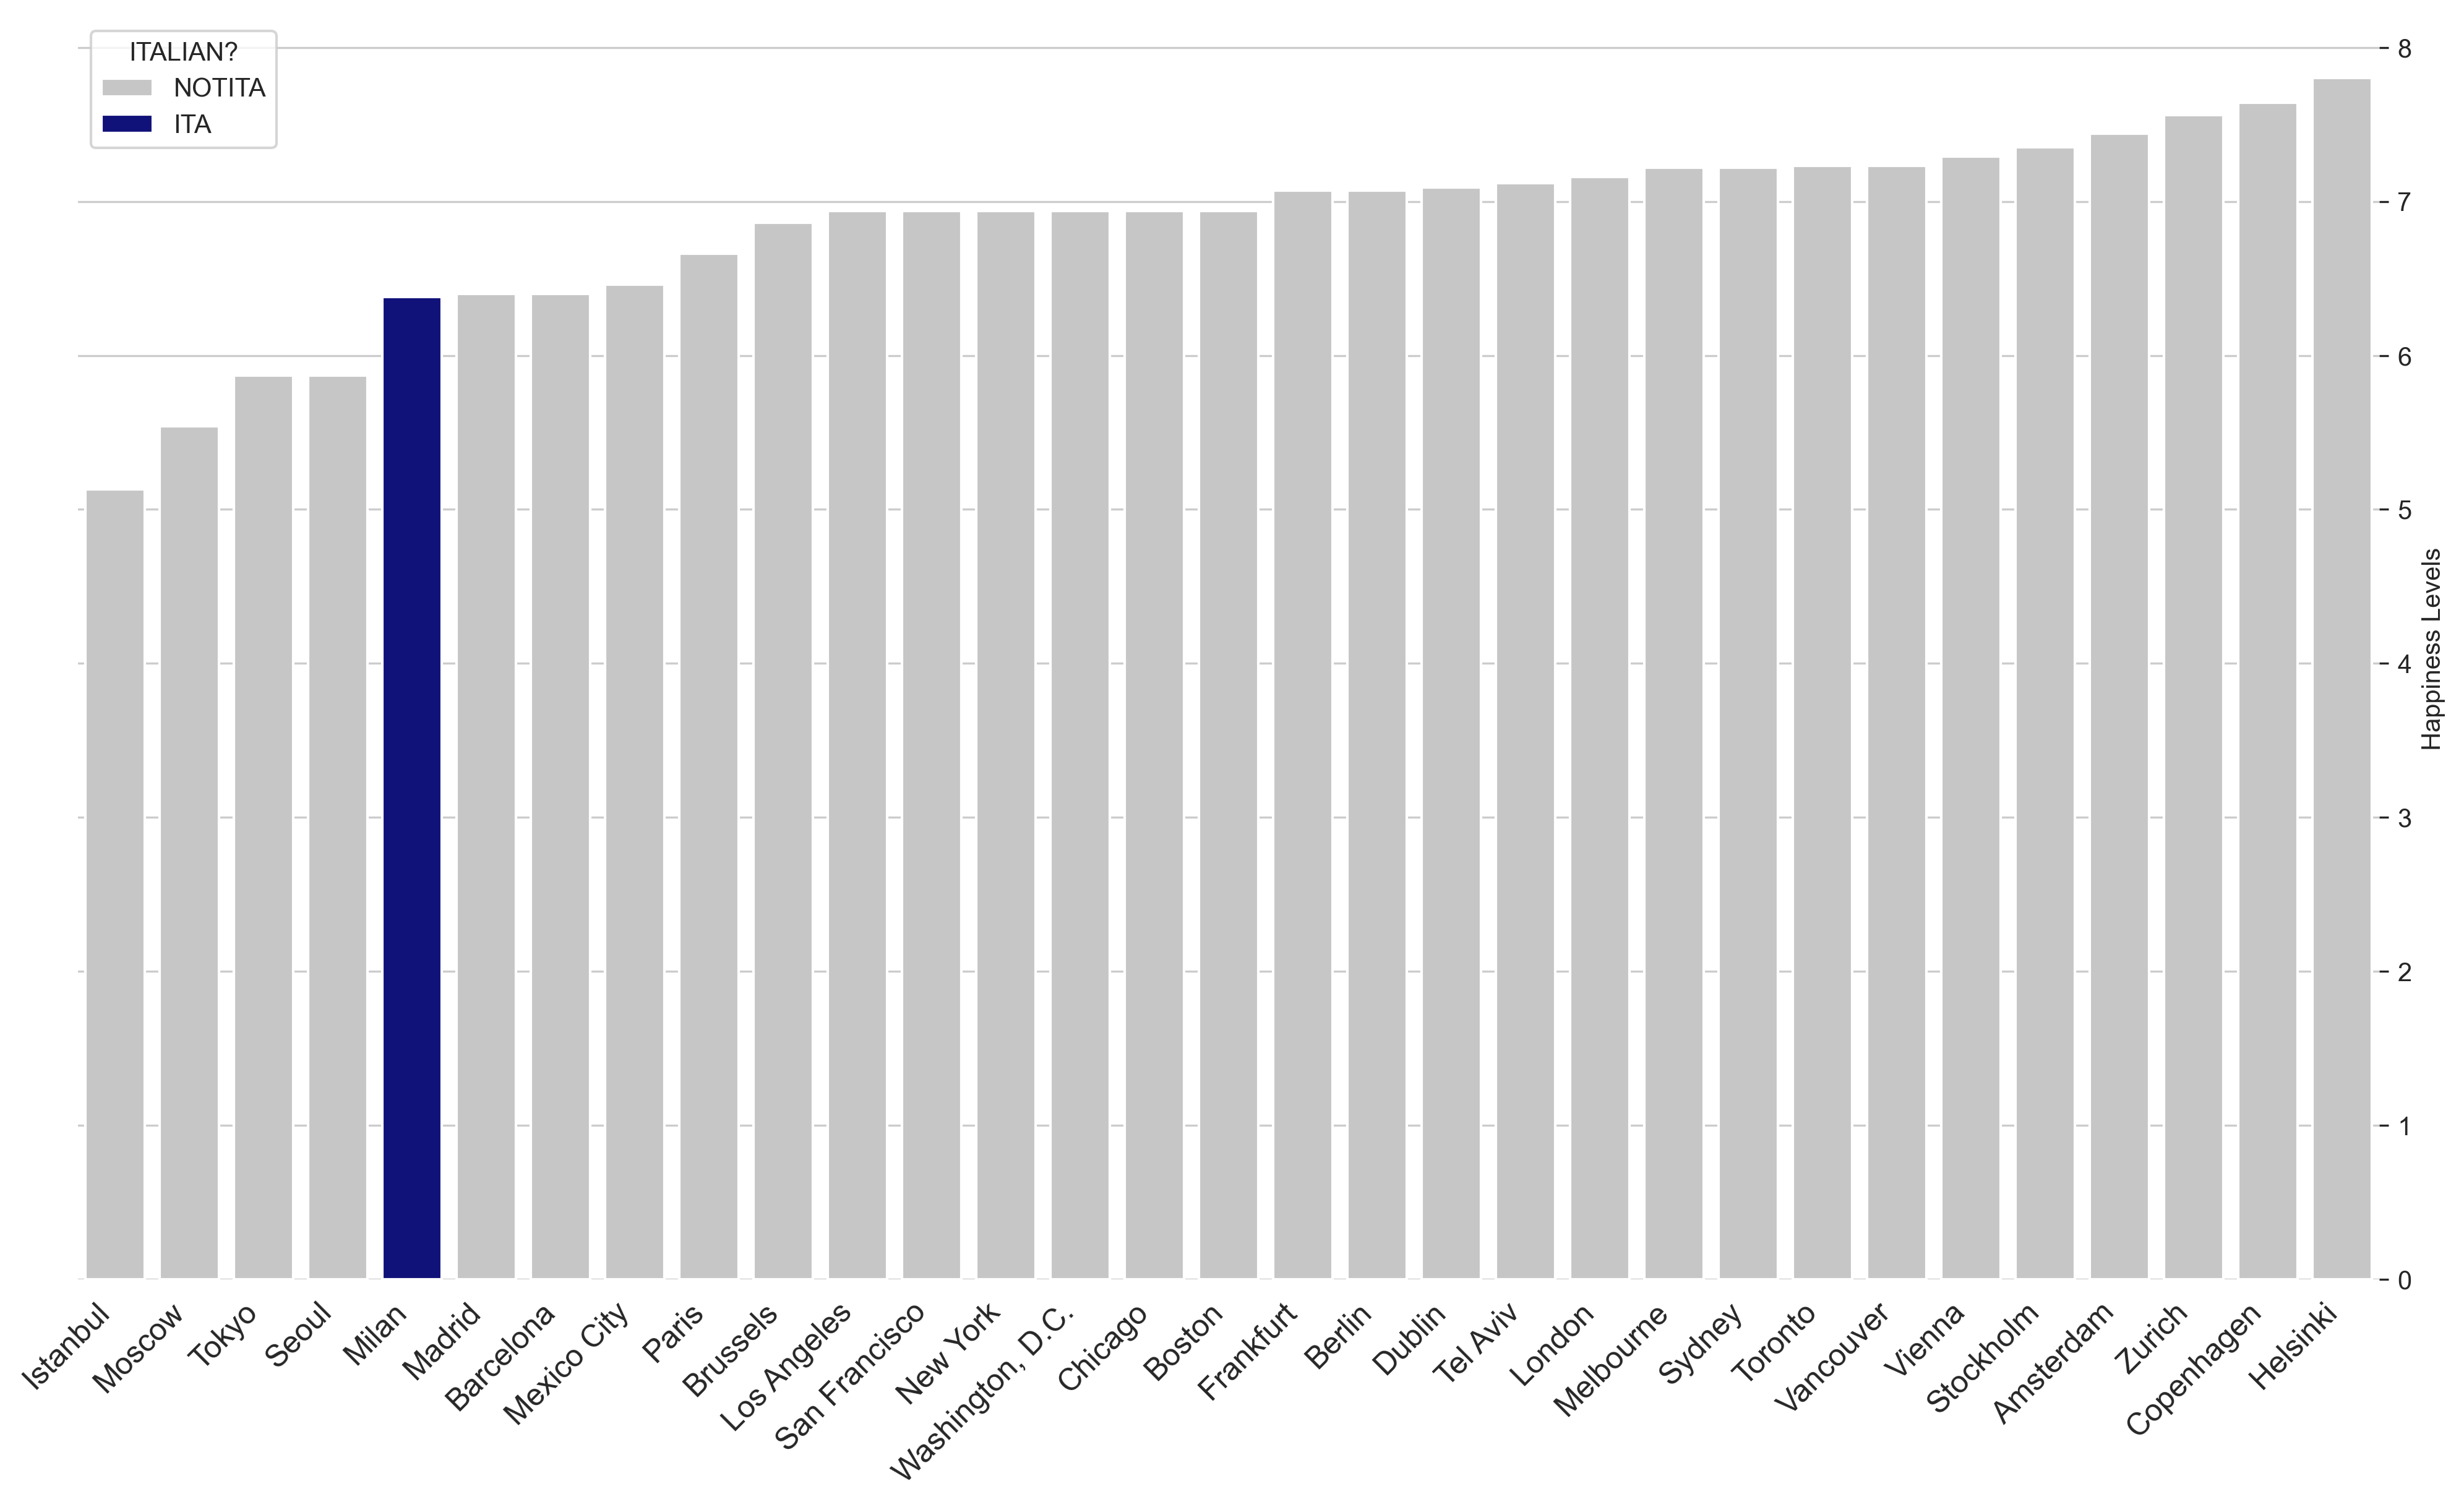

In [5]:
# ARE CITIES ITALIAN OR NOT?, ADDING "ITA" AND "NOTITA" COLUMN
from io import StringIO
import pandas as pd
import requests
url='https://simplemaps.com/static/data/country-cities/it/it.csv'
s=requests.get(url).text
itcities=pd.read_csv(StringIO(s)).iloc[:,0]
itcities = itcities.to_frame()

itcitiescheck = df.City.isin(itcities.city).astype(int)
itcitiescheck.rename('italian_or_not', inplace = True)
df = pd.concat([df, itcitiescheck], axis = 1)
df['italian_or_not'].replace({0:'NOTITA' ,1:'ITA'}, inplace = True)

# PLOTTING BARCHART
import seaborn as sns
import matplotlib.pyplot as plt

palette = {'NOTITA': '#C6C6C6',
           'ITA': '#00008b',}

plt.figure(figsize=(16, 9), dpi = 300)
sns.set_style('whitegrid')
g = sns.barplot(x='City',
                y='happiness_levels',
                hue='italian_or_not',
                palette=palette,
                order = df.sort_values('happiness_levels').City,
                dodge = False,
                data=df)

g.set_xticklabels(g.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right',
                  fontsize = 12)

g.set(xlabel = None,
      ylabel= 'Happiness Levels')

g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['bottom'].set_visible(False)
g.spines['left'].set_visible(False)
g.yaxis.set_label_position("right")
g.yaxis.tick_right()

plt.legend(loc='upper left',
           title='ITALIAN?')

##### Plot the correlation between any two pair of variables as a heatmap with a custom palette. What can you say about the result?

Text(0.5, 1.0, 'Correlation heatmap between any two pair of variables')

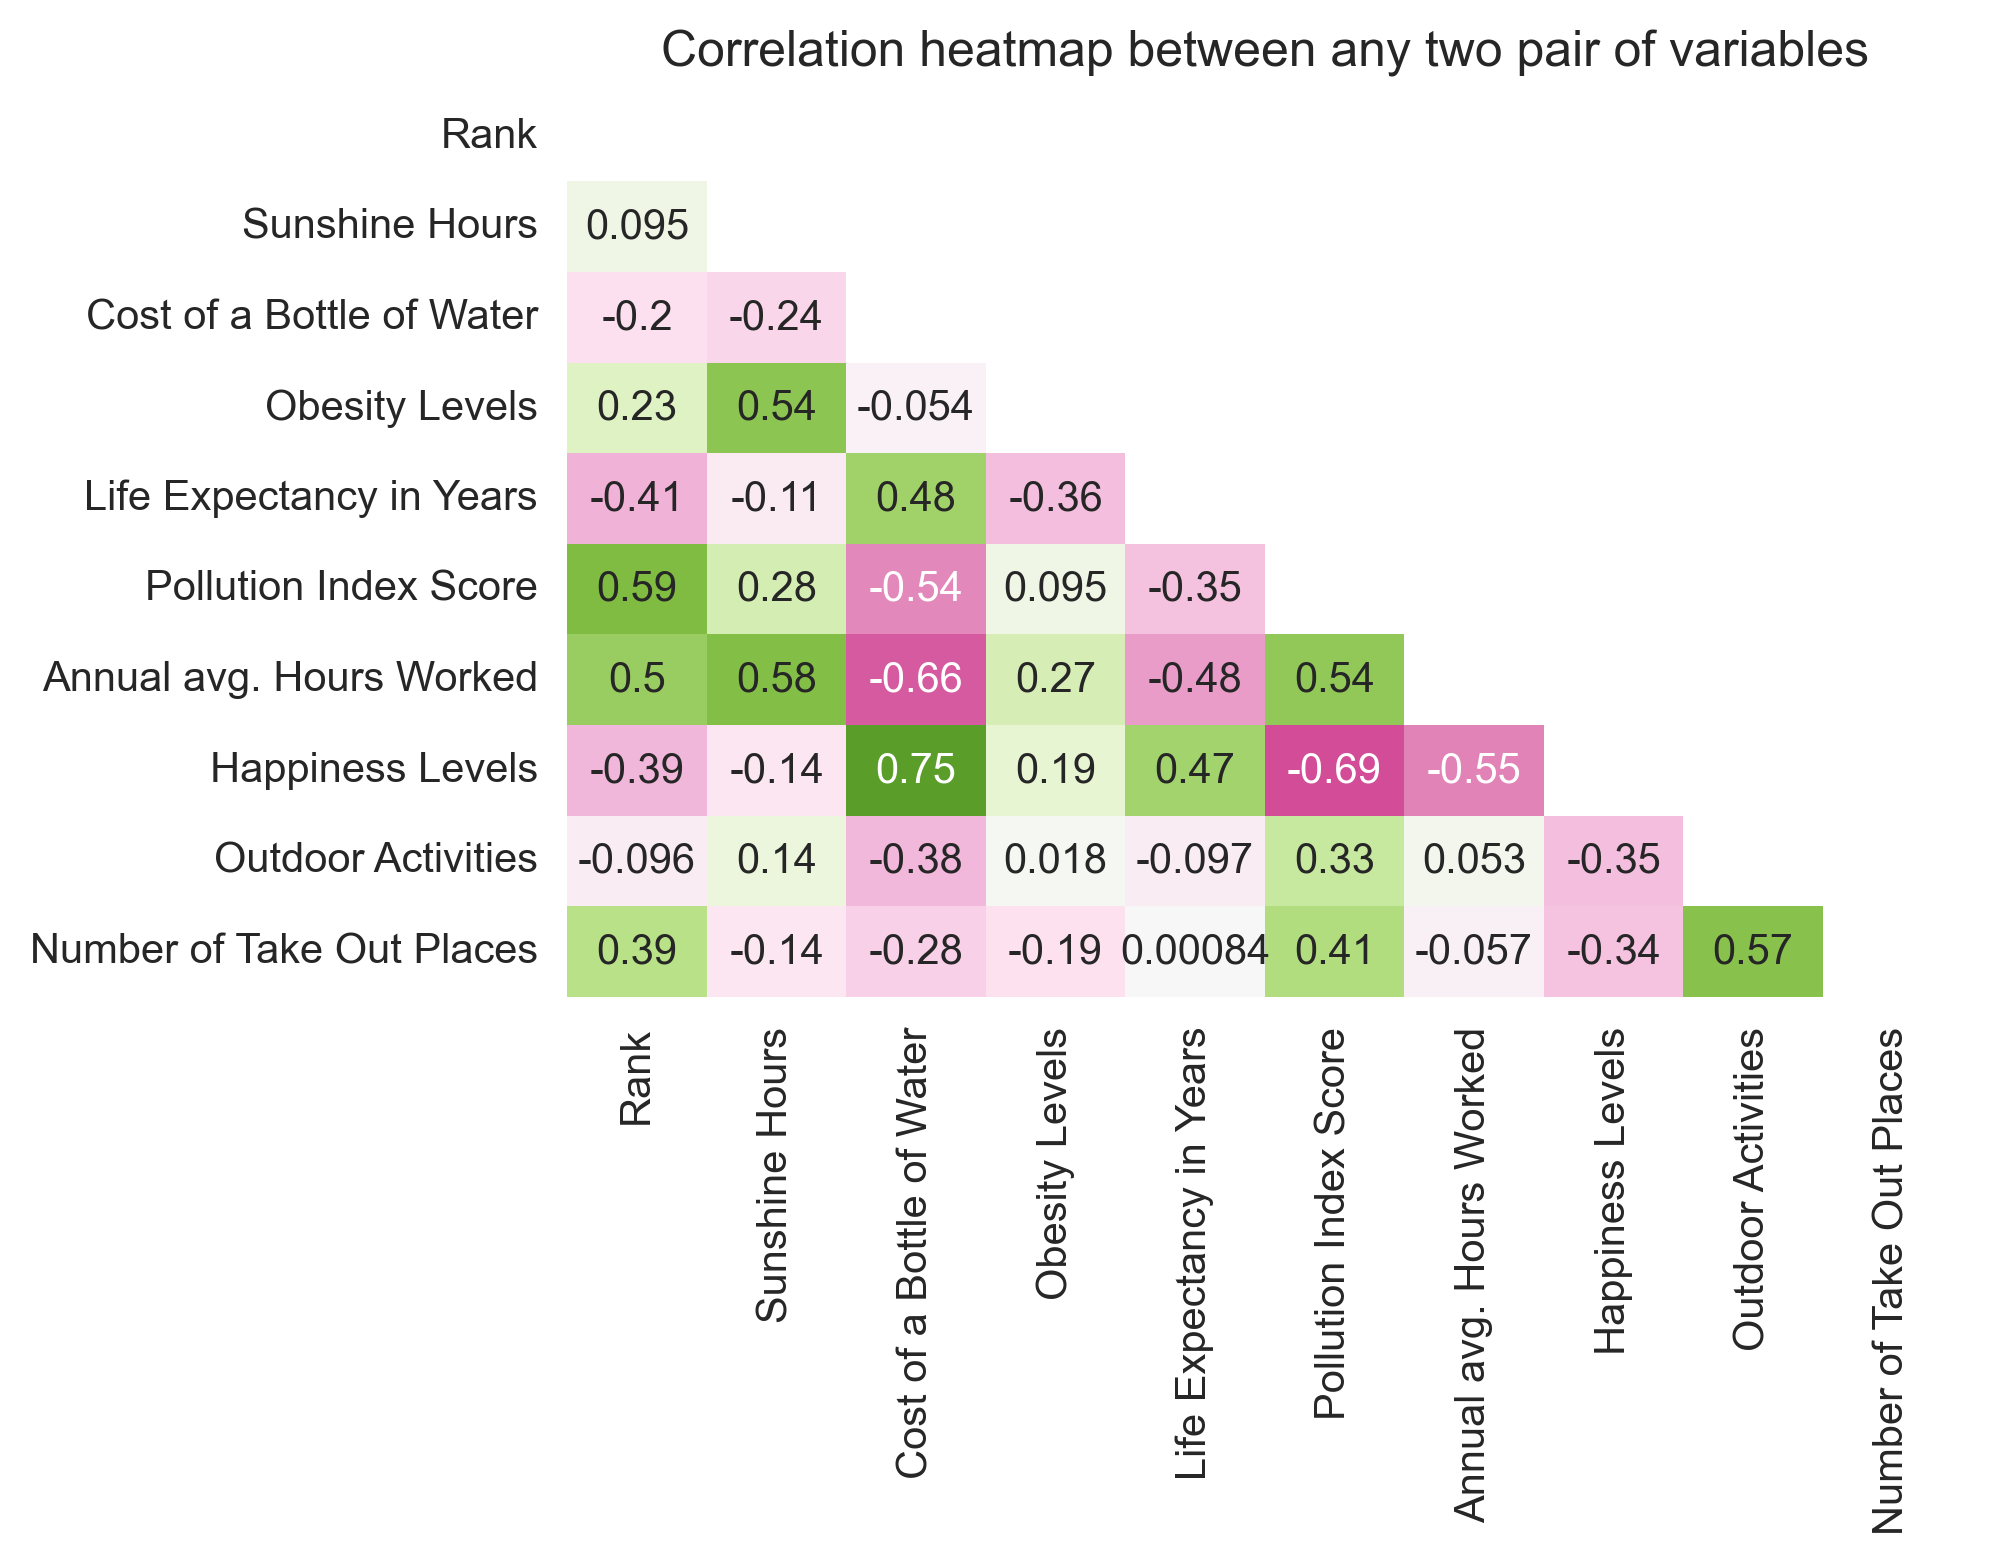

In [6]:
# PLOTTING THE CORRELATION HEATMAP - POINT3
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

heatmaplabels = ['Rank','Sunshine Hours','Cost of a Bottle of Water','Obesity Levels','Life Expectancy in Years','Pollution Index Score','Annual avg. Hours Worked','Happiness Levels','Outdoor Activities', 'Number of Take Out Places']

plt.figure(dpi = 300)
sns.heatmap(corr,
            xticklabels=heatmaplabels,
            yticklabels=heatmaplabels,
            vmin = -0.69,
            vmax = 1,
            center = 0,
            cmap = 'PiYG',
            cbar = False,
            annot = True,
            mask = mask)
plt.title('Correlation heatmap between any two pair of variables')

* I used a specific palette to plot the correlation coefficients between each pair of variables. Because of the range [-1,1] of the correlation coefficient, I've used a divergent palette: when two variables are highly positively correlated, the coefficient will tend to +1 and the cell will tend to a deep green; when negatively correlated, the cell will tend to a deep magenta. If two variables are uncorrelated, the cell will tend to a white.
* Since the coefficients spread from -.69 to 1, I've re-centered the color map specifying the min, max and center value.
* Values are showed inside each cell, that's the reason why I omitted the color legend.
* Using *mask* argument, I've hidden the "ones" diagonal, which is obvious, and the top right, mirror side of the corrplot, which is the same of the bottom left (those would be junks!)
#### Notes:
* The cost of a bottle of water/happiness levels show the highest correlation, even though that should be totally random.
* The number of take out places/life expectancy in years show the highest uncorrelation, again that should be totally random.
* Happiness level vs Pollution Index Score are the most negatively correlated each other: people are sad when the pollution is high.
* The higher pollution index score, the briefer the life expectancy, which makes definitely sense.


##### Divide the cities into 6 groups based on the first letter of their name (A-D, E-H, I-L, M-P, Q-U, V-Z). Plot a bar chart for the “Number of take out places” variable with six bins (A-D, E-H, I-L, M-P, Q-U, V-Z). Each bin contains the sum of the values of “Number of take out places” for the cities that fall in that bin.

[Text(0.5, 0, 'Cities initials'), Text(0, 0.5, 'Number of take out places')]

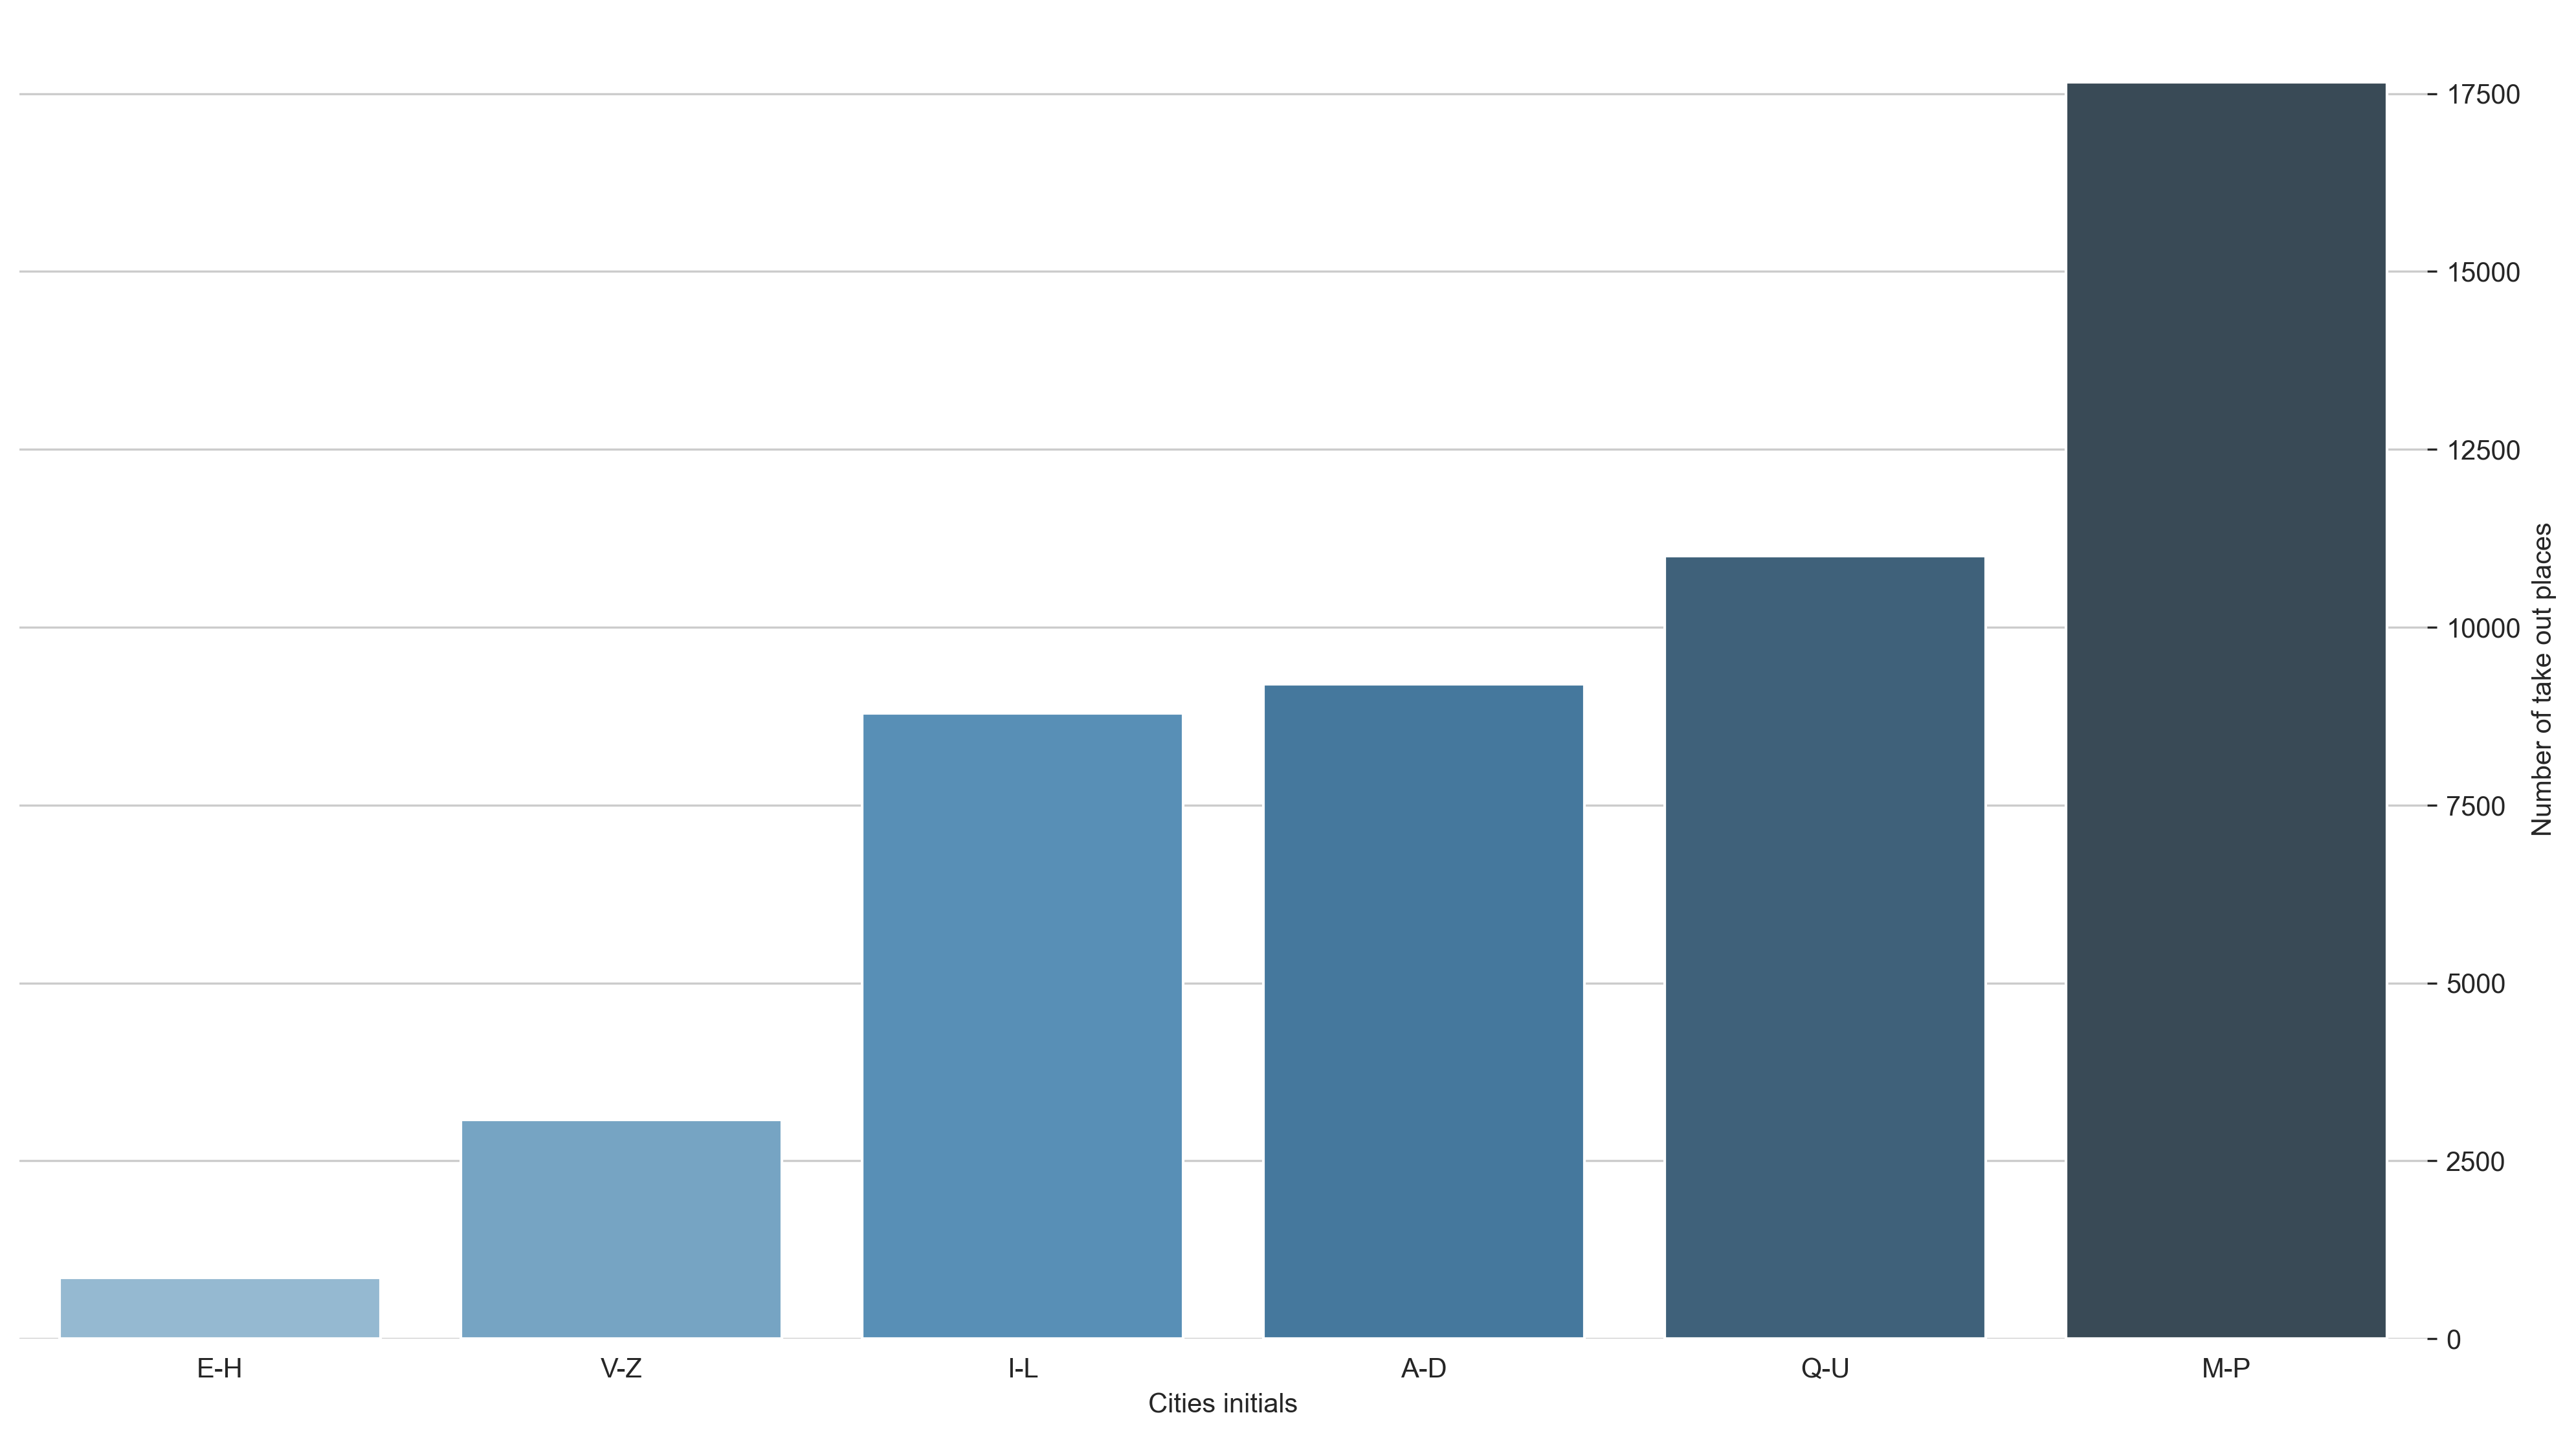

In [7]:
#GROUPING BY FIRST LETTER
dford = df.sort_values('City')
dford = dford.City.str[0].map(ord)
df2 = df.groupby(pd.cut(dford,[65,68,72,76,80,85,90],
                        include_lowest=True))['number_of_takeout_places'].sum().reset_index()

bins = pd.DataFrame({'cities_bins': ['A-D','E-H','I-L','M-P','Q-U','V-Z']})
bins.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df2 = pd.concat([df2,bins], axis = 1)
df2 = df2.iloc[:,[2,1]]

#PLOTTING BARCHART
plt.figure(figsize=(16, 9), dpi = 300)
h = sns.barplot(x='cities_bins',
                y='number_of_takeout_places',
                order = df2.sort_values('number_of_takeout_places').cities_bins,
                dodge = False,
                palette="Blues_d",
                data=df2)

h.spines['top'].set_visible(False)
h.spines['right'].set_visible(False)
h.spines['bottom'].set_visible(False)
h.spines['left'].set_visible(False)
h.yaxis.set_label_position("right")
h.yaxis.tick_right()

h.set(xlabel='Cities initials',
      ylabel='Number of take out places')

##### Plot the graphics as described in Figure 1

In [8]:
# ARE CITIES FROM USA OR NOT? ADDING "USA" OR "NOTUSA" COLUMN (IT WILL BE NEEDED IN THE NEXT BLOCK)
dfusa = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv').iloc[:,0].to_frame()
df3 = df.copy()
usacitiescheck = df3.City.isin(dfusa.City).astype(int)
usacitiescheck.rename('USA_or_not', inplace = True)
df3 = pd.concat([df3, usacitiescheck], axis = 1)
df3['USA_or_not'].replace({0:'NOTUSA' ,1:'USA'}, inplace = True)
df3 = df3.iloc[:,[0,9,13]]
df3 = df3[df3.USA_or_not == "USA"]
# UNFORTUNATELY, THERE'S ALSO DUBLIN IN USA, SO IT DISPLAYS A MATCH. HOWEVER, I'LL MANUALLY
# DROP IT BECAUSE THE ORIGINAL DATAFRAME WAS RELATED TO DUBLIN, IRELAND
df3 = df3.drop(27)

/Users/vincenzojuniorstriano/PycharmProjects/datavisualization/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vincenzojuniorstriano/PycharmProjects/datavisualization/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vincenzojuniorstriano/PycharmProjects/datavisualization/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argumen

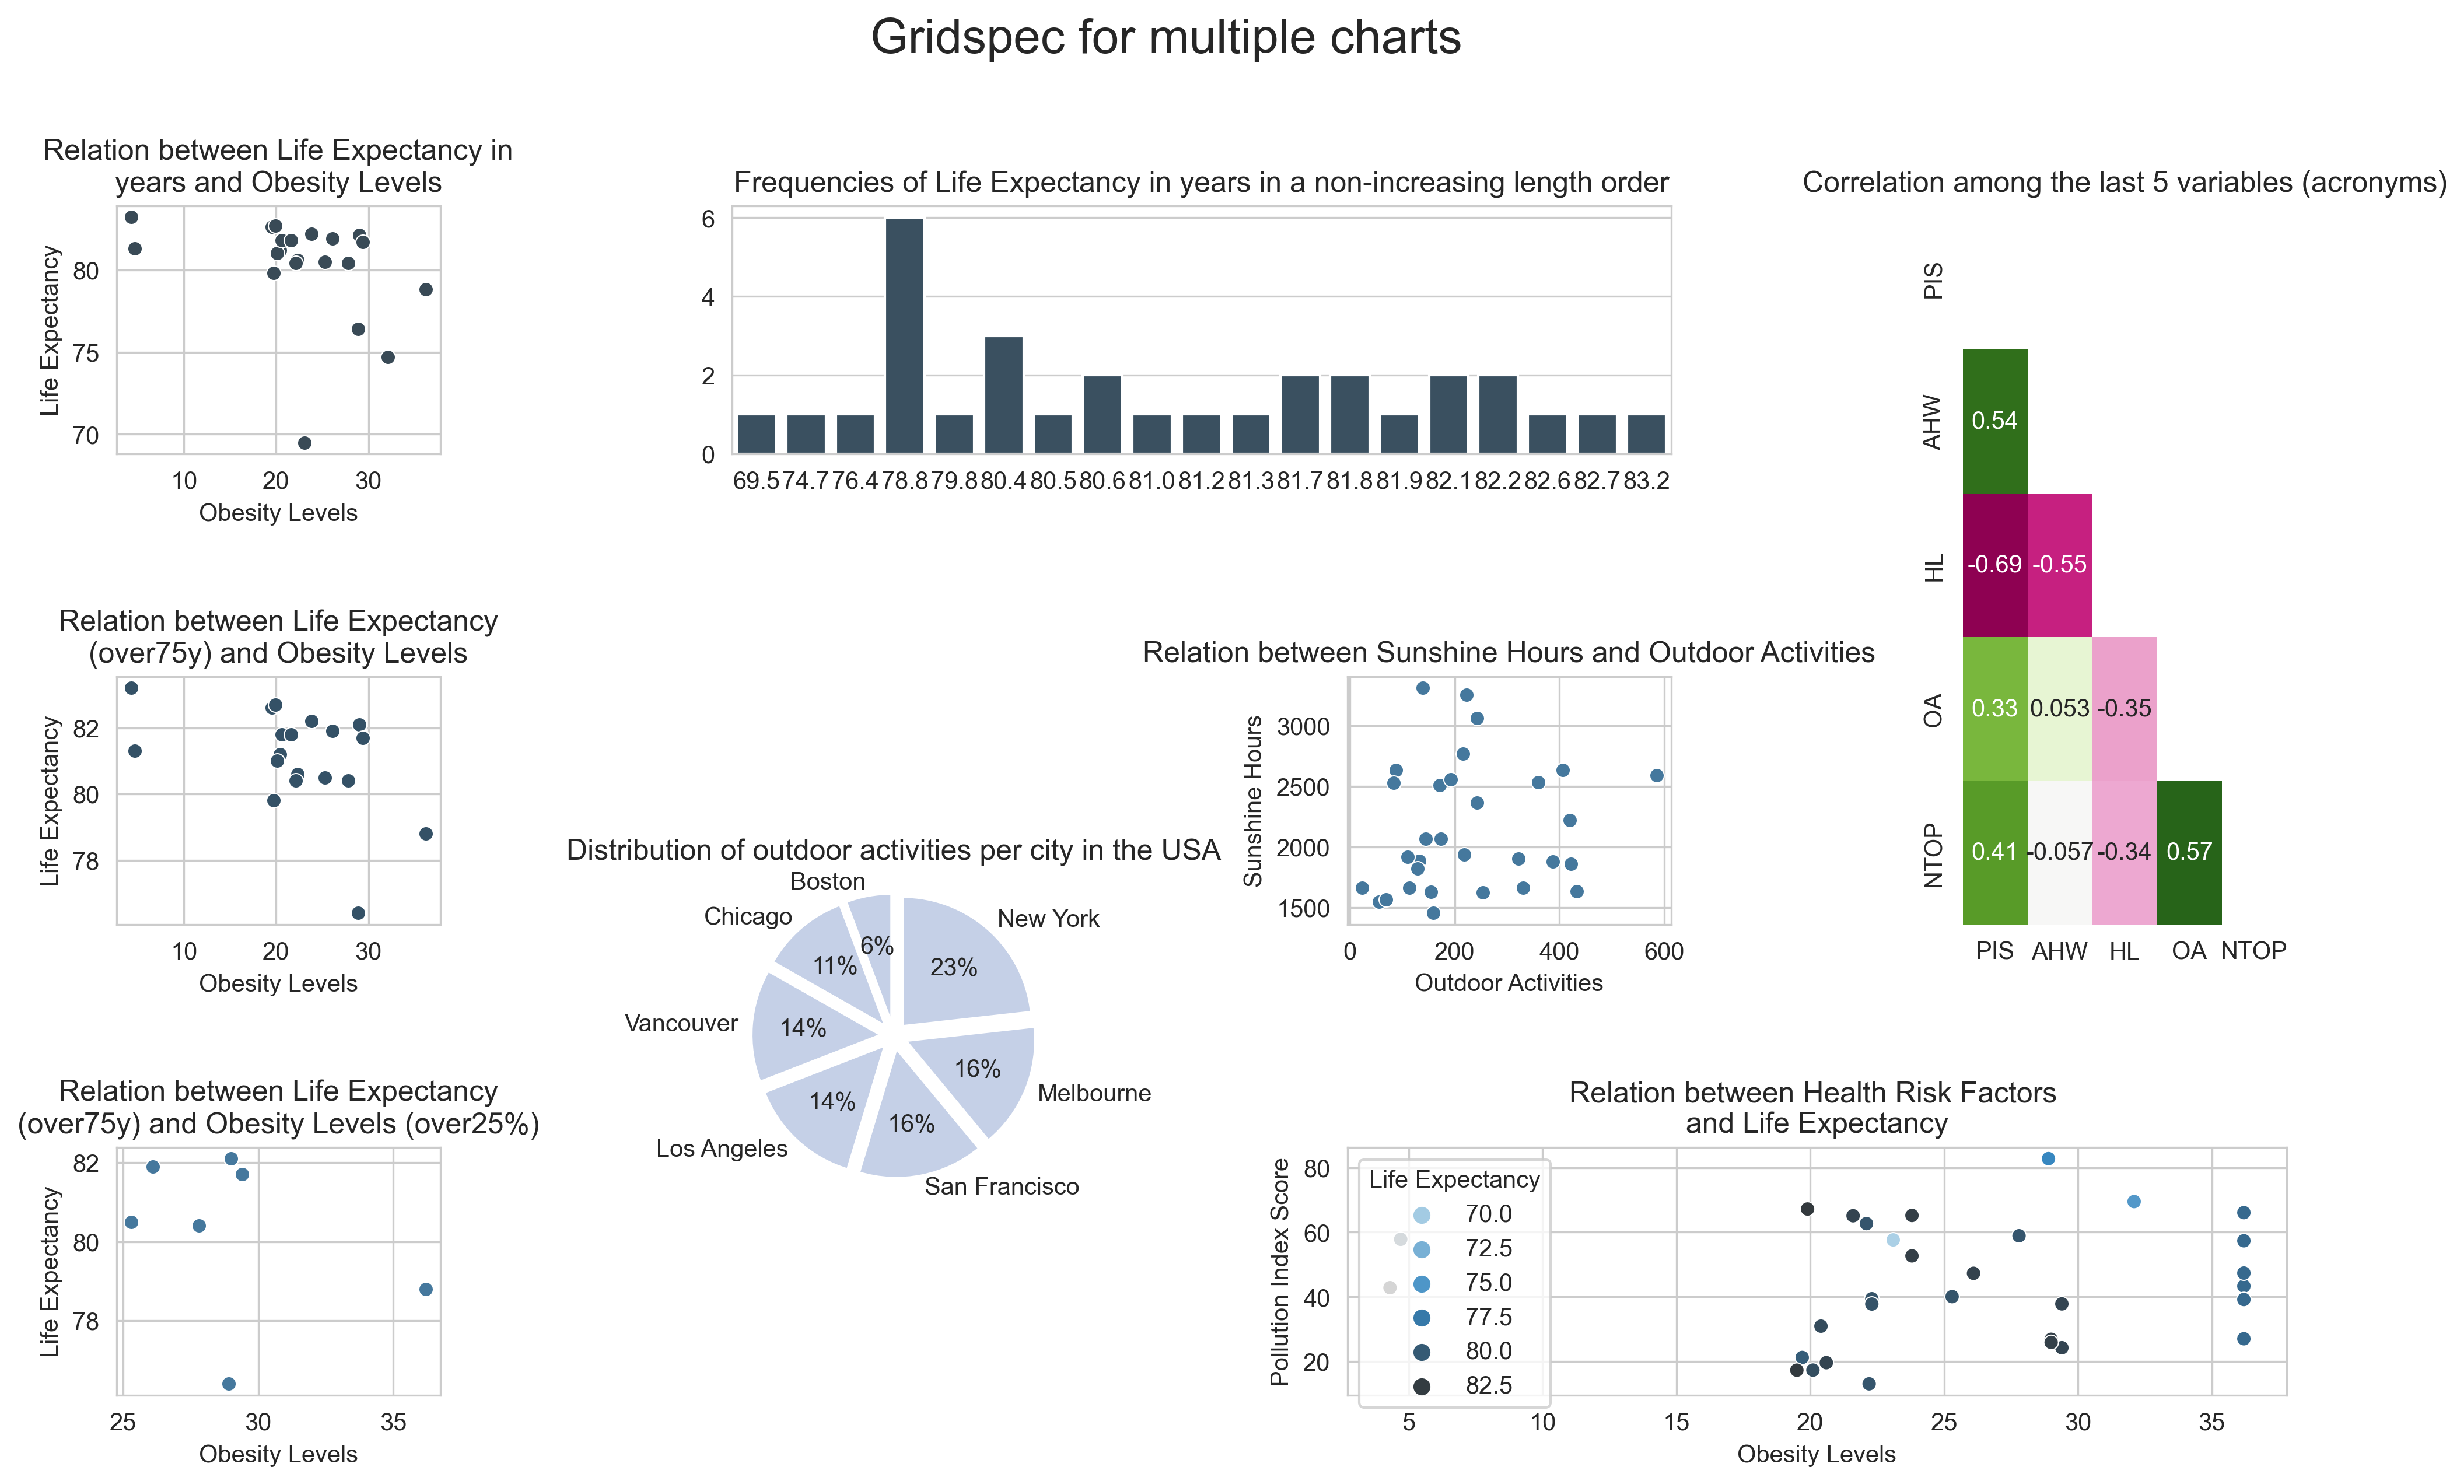

In [12]:
# PLOTTING THE GRIDSPEC
from matplotlib import gridspec
fig2 = plt.figure(figsize=(16,9), dpi = 300)
gs = gridspec.GridSpec(3,4)
gs.update(wspace=0.9, hspace=0.9)
plt.subplots_adjust(wspace=2.5, hspace=0.4)
plt.suptitle("Gridspec for multiple charts", size=20, y=1)
plt.tight_layout()

# WALL VERSUS GROUND RULE -> Y VS X
subplot1 = fig2.add_subplot(gs[0,0])
aa = sns.scatterplot('obesity_levels',
                     'life_expectancy_in_years',
                     color=['#394a56'],
                     data = df)
aa.set(xlabel='Obesity Levels',
       ylabel='Life Expectancy',
       title = 'Relation between Life Expectancy in\nyears and Obesity Levels')

subplot2 = fig2.add_subplot(gs[0,1:3])
ab = sns.countplot(x = 'life_expectancy_in_years',
                   palette=['#345166'],
                   data = df)
ab.set(xlabel=None,
       ylabel=None,
       title = 'Frequencies of Life Expectancy in years in a non-increasing length order')

dfcorrelation5 = df.iloc[:,6:12]
corr2 = dfcorrelation5.corr()
mask2 = np.zeros_like(corr2)
mask2[np.triu_indices_from(mask2)] = True
subplot3 = fig2.add_subplot(gs[0:2,3])
heatmaplabelsINIT = ['PIS', 'AHW', 'HL', 'OA', 'NTOP']
ac = sns.heatmap(corr2,
                 xticklabels = heatmaplabelsINIT,
                 yticklabels = heatmaplabelsINIT,
                 cmap = 'PiYG',
                 annot = True,
                 mask = mask2,
                 cbar = False)
ac.set(title = 'Correlation among the last 5 variables (acronyms)')

subplot4 = fig2.add_subplot(gs[1,0])
dfover75 = df.loc[df['life_expectancy_in_years'] > 75]
ad = sns.scatterplot('obesity_levels',
                     'life_expectancy_in_years',
                     color = ['#345166'],
                     data = dfover75)
ad.set(xlabel = 'Obesity Levels',
       ylabel = 'Life Expectancy',
       title = 'Relation between Life Expectancy\n(over75y) and Obesity Levels')

subplot5 = fig2.add_subplot(gs[1:3,1])
df4 = df3.sort_values(by = 'outdoor_activities')
plt.pie('outdoor_activities',
        labels = 'City',
        colors = ['#C5D0E7'],
        autopct = '%.0f%%',
        counterclock = True,
        startangle= 90,
        explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1),
        data = df4)
plt.title('Distribution of outdoor activities per city in the USA')

subplot6 = fig2.add_subplot(gs[1,2])
ae = sns.scatterplot('outdoor_activities',
                     'sunshine_hours',
                     color = ['#45789d'],
                     data = df)
ae.set(xlabel = 'Outdoor Activities',
       ylabel = 'Sunshine Hours',
       title = 'Relation between Sunshine Hours and Outdoor Activities')

subplot7 = fig2.add_subplot(gs[2,0])
dfover7525 = df.loc[(df['life_expectancy_in_years'] > 75) & (df['obesity_levels'] > 25)]
af = sns.scatterplot('obesity_levels',
                     'life_expectancy_in_years',
                     color = ['#45789d'],
                     data = dfover7525)
af.set(xlabel = 'Obesity Levels',
       ylabel = 'Life Expectancy',
       title = 'Relation between Life Expectancy\n(over75y) and Obesity Levels (over25%)')

subplot8 = fig2.add_subplot(gs[2,2:4])
ag = sns.scatterplot('obesity_levels',
                    'pollution_index_score',
                    hue = 'life_expectancy_in_years',
                    palette = 'Blues_d',
                    data=df)
ag.set(xlabel = 'Obesity Levels',
       ylabel = 'Pollution Index Score',
       title = 'Relation between Health Risk Factors \nand Life Expectancy')
plt.legend(title = 'Life Expectancy')

The _custom chart_ represents the relation between two health risk factors and life expectancy: I expect that the closer the dots to the center of axis, the lower the risk factor, the longer the life, the darker the dots. Quite right!